In [1]:
# import required libraries for dataframe and visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import homogeneity_score
import scipy.stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np
import graphviz
from sklearn.ensemble import RandomForestClassifier

#%matplotlib inline # for data visualization
# movie,certificate,genre,rate,metascore,synopsis,votes,gross,critic reviews, popularity,awards_wins,Oscar_Best_Director
# Oscar_Best_Director
# TODO:: Import any other libraries you may need 

In [2]:
# TODO:: load your .csv dataset into a dataframe

df = pd.read_csv("Big_oscar.csv")

In [3]:
# TODO:: Use the head function to observe the first five lines of the dataframe
df.head()

,certificate,genre,rate,metascore,votes,gross,critic_reviews,popularity,awards_wins,awards_nominations,Oscar_Best_Picture_won,Oscar_Best_Picture_nominated,Oscar_Best_Director_won,Oscar_Best_Actor_won,Oscar_Best_Actress_won
0,PG-13,Comedy|Fantasy|Romance,6.4,44.0,66660,47100000.0,125.0,2363.0,1,4,No,No,No,No,No
1,G,Animation|Adventure|Comedy,7.0,88.0,144475,106790000.0,186.0,2859.0,5,11,No,No,No,No,No
2,PG-13,Action|Adventure|Family,5.7,40.0,273203,154700000.0,278.0,1876.0,0,0,No,No,No,No,No
3,R,Biography|Drama|Romance,7.4,61.0,63852,25780000.0,126.0,2508.0,2,12,No,No,No,No,No
4,PG-13,Adventure|Drama|Fantasy,8.8,92.0,1286275,313840000.0,296.0,204.0,26,67,No,Yes,No,No,No


In [4]:
# TODO:: Use the shape member variable to observe the shape of our dataset. 
df.shape
#Remove
df.columns

import pandas as pd

# drop the column you want to delete
dontDrop = ['certificate','genre','rate','metascore','votes','gross','critic_reviews', 'popularity','awards_wins', 'Oscar_Best_Director_won', 'Oscar_Best_Actor_won','Oscar_Best_Actress_won','metascore','awards_nominations','Oscar_Best_Picture_won','Oscar_Best_Picture_nominated']
for i in df.columns:
    if i not in dontDrop: 
        df = df.drop(i , axis=1)
    elif i in dontDrop:
        print(i)
df.columns

# write the updated dataframe to a new CSV file
df.to_csv('Big_oscar.csv', index=False)


certificate
genre
rate
metascore
votes
gross
critic_reviews
popularity
awards_wins
awards_nominations
Oscar_Best_Picture_won
Oscar_Best_Picture_nominated
Oscar_Best_Director_won
Oscar_Best_Actor_won
Oscar_Best_Actress_won


In [5]:
df.head
df['rate'].unique

<bound method Series.unique of 0       6.4
1       7.0
2       5.7
3       7.4
4       8.8
       ... 
1178    8.3
1179    8.4
1180    6.8
1181    6.3
1182    7.4
Name: rate, Length: 1183, dtype: float64>

In [6]:
df.isnull().sum()

certificate                      10
genre                             0
rate                              0
metascore                        14
votes                             0
gross                            24
critic_reviews                    7
popularity                      119
awards_wins                       0
awards_nominations                0
Oscar_Best_Picture_won            0
Oscar_Best_Picture_nominated      0
Oscar_Best_Director_won           0
Oscar_Best_Actor_won              0
Oscar_Best_Actress_won            0
dtype: int64

In [7]:
# TODO:: See a summary of the data to check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   certificate                   1173 non-null   object 
 1   genre                         1183 non-null   object 
 2   rate                          1183 non-null   float64
 3   metascore                     1169 non-null   float64
 4   votes                         1183 non-null   int64  
 5   gross                         1159 non-null   float64
 6   critic_reviews                1176 non-null   float64
 7   popularity                    1064 non-null   float64
 8   awards_wins                   1183 non-null   int64  
 9   awards_nominations            1183 non-null   int64  
 10  Oscar_Best_Picture_won        1183 non-null   object 
 11  Oscar_Best_Picture_nominated  1183 non-null   object 
 12  Oscar_Best_Director_won       1183 non-null   object 
 13  Osc

In [8]:
# TODO:: View which column labels remain in the dataframe
df.columns

Index(['certificate', 'genre', 'rate', 'metascore', 'votes', 'gross',
       'critic_reviews', 'popularity', 'awards_wins', 'awards_nominations',
       'Oscar_Best_Picture_won', 'Oscar_Best_Picture_nominated',
       'Oscar_Best_Director_won', 'Oscar_Best_Actor_won',
       'Oscar_Best_Actress_won'],
      dtype='object')

In [9]:

# Drop the three empty columns from the data 
# TODO:: Inspect statistical information about the data set 
df.describe()


,rate,metascore,votes,gross,critic_reviews,popularity,awards_wins,awards_nominations
count,1183.000000,1169.000000,1.183000e+03,1.159000e+03,1176.000000,1064.000000,1183.000000,1183.000000
mean,7.045478,63.744226,1.925260e+05,8.609816e+07,269.219388,1296.877820,2.894336,10.687236
std,0.826094,16.973300,1.912311e+05,1.011521e+08,144.088080,1019.818482,6.237800,16.314337
min,2.400000,9.000000,5.070000e+02,1.207000e+03,1.000000,1.000000,0.000000,0.000000
25%,6.600000,51.000000,6.550700e+04,1.603000e+07,165.000000,524.750000,0.000000,0.000000
50%,7.100000,65.000000,1.402320e+05,5.275000e+07,239.000000,1088.500000,0.000000,4.000000
75%,7.600000,77.000000,2.631190e+05,1.193700e+08,351.000000,1772.750000,3.000000,14.000000
max,9.000000,100.000000,1.743331e+06,9.366300e+08,816.000000,4937.000000,49.000000,100.000000


In [10]:
#dont delete
#for col in df.columns:
    #try:
        #df[col] = df[col].astype('float64')
    #except:
        #pass
#TODO:: Write code to view how many different labels there are in a specific categorical variable
len(df['genre'].unique())


219

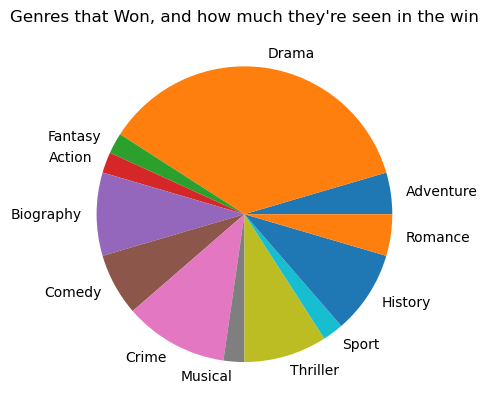

In [11]:
dict = {}
genresWon = []
for index, item in enumerate(df['genre']):
    genre_list = item.split('|')
    for j in genre_list:
        if j not in dict:
            dict[j] = 1
        else:
            dict[j] += 1
    if(df['Oscar_Best_Picture_won'][index] == 'Yes'):
        genresWon.append(genre_list)

winDict = {}
for i in genresWon:
    for j in i:
        if j in winDict:
            winDict[j] += 1
        else:
            winDict[j] = 1

genreNameWin = list(winDict.keys())
genreCountWin = list(winDict.values())

plt.title("Genres that Won, and how much they're seen in the win")
plt.pie(genreCountWin, labels = genreNameWin)
plt.show()
   

    



array([[<Axes: title={'center': 'critic_reviews'}>]], dtype=object)

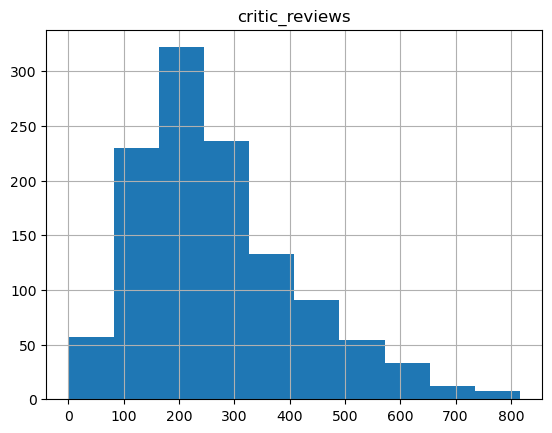

In [12]:
# TODO::Generate a new histogram with a categorical or discrete numerical variable
df[['critic_reviews']].hist()

In [13]:
oscarWins = ['Oscar_Best_Picture_won','Oscar_Best_Director_won','Oscar_Best_Actor_won','Oscar_Best_Actress_won']
for i in oscarWins:
    df[i] = df[i].replace({'Yes': 1, 'No': 0})

df['rate'] = df['rate'] * 10


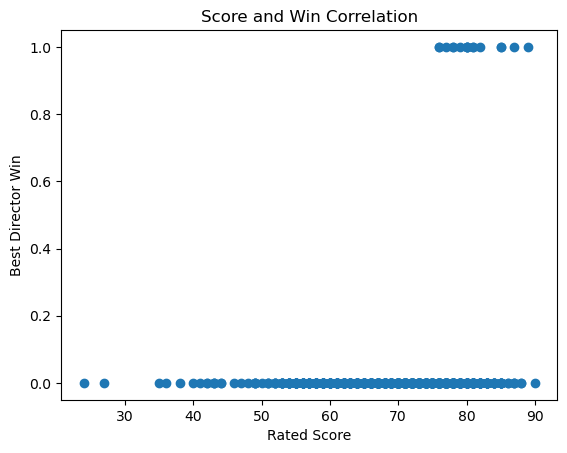

In [14]:
x = df['Oscar_Best_Director_won']  # assuming this line is already defined

# TODO::Set Y variable
y = df['rate']
# TODO::Generate a new scatter plot for a different pair of variables
plt.scatter(y, x)
plt.ylabel('Best Director Win')
plt.xlabel('Rated Score')
plt.title('Score and Win Correlation')
plt.show()

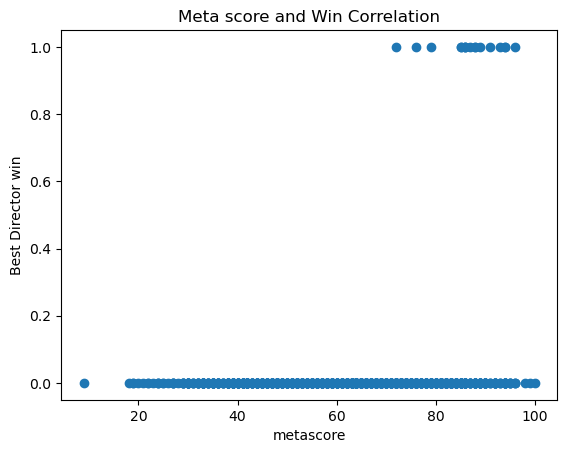

In [15]:
x = df['Oscar_Best_Director_won']  # assuming this line is already defined
# TODO::Set Y variable
y = df['metascore']
# TODO::Generate a new scatter plot for a different pair of variables
plt.scatter(y, x)
plt.ylabel('Best Director win')
plt.xlabel('metascore')
plt.title('Meta score and Win Correlation')
plt.show()

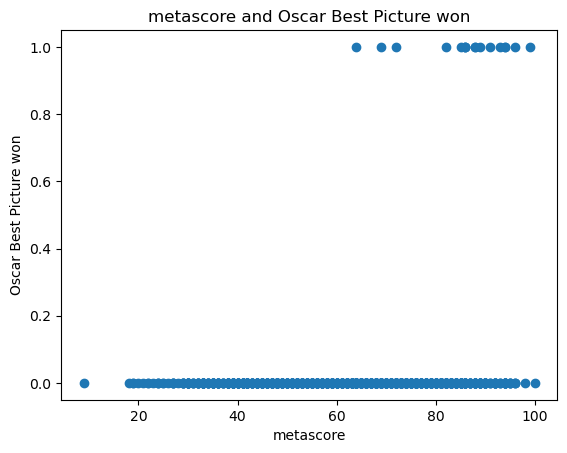

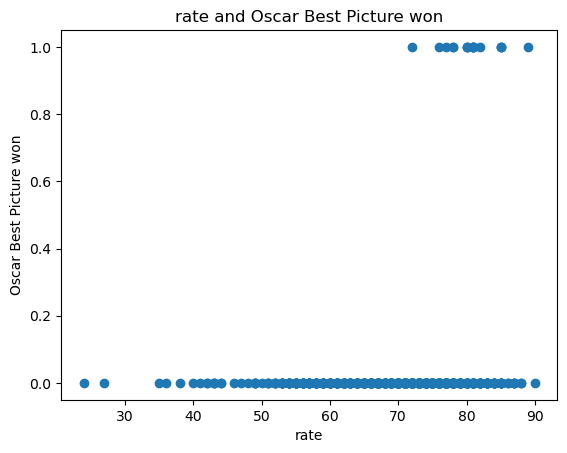

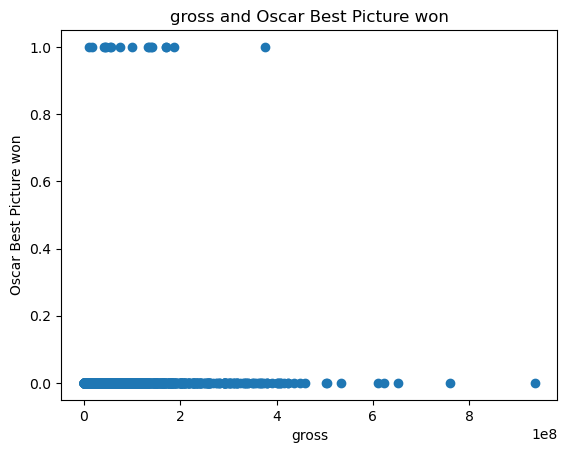

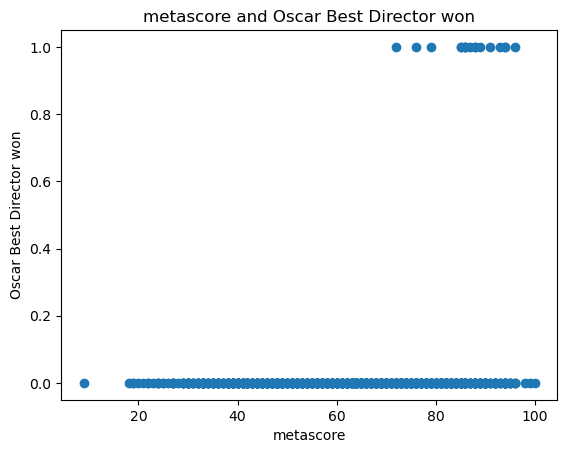

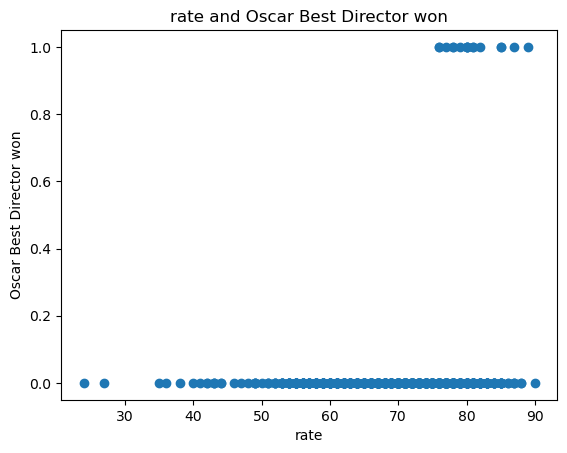

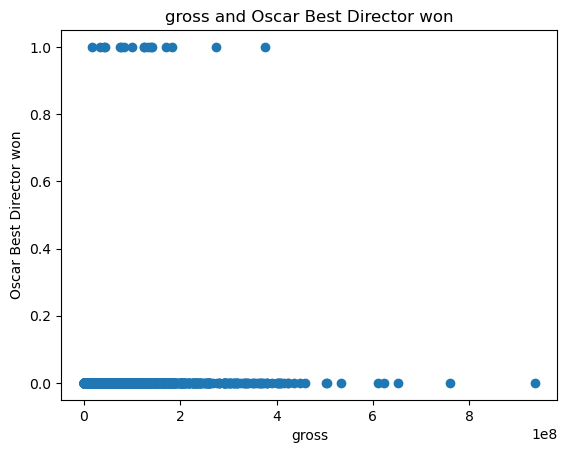

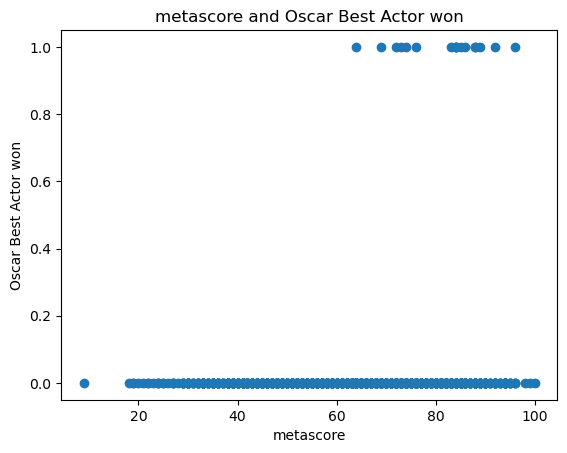

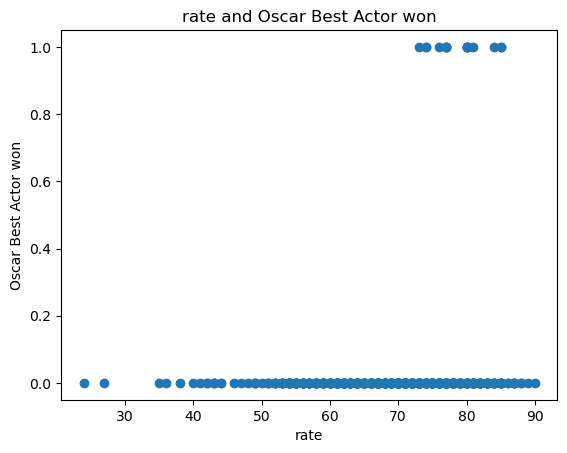

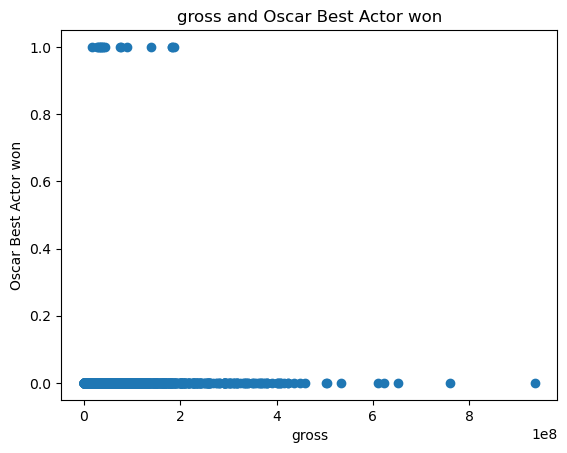

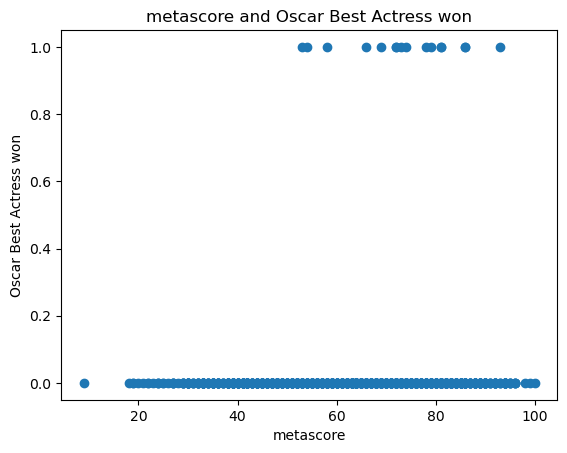

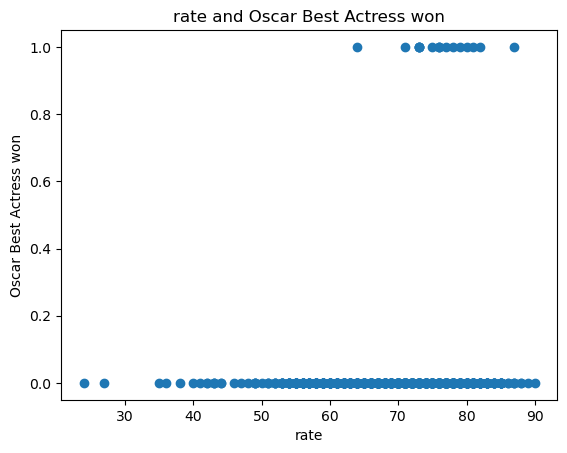

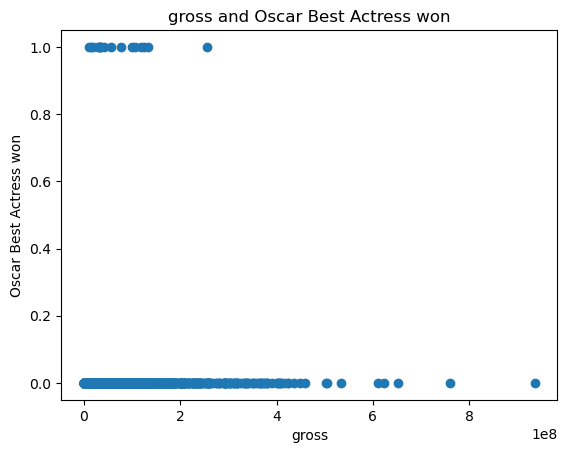

In [16]:

oscarWins = ['Oscar_Best_Picture_won','Oscar_Best_Director_won','Oscar_Best_Actor_won','Oscar_Best_Actress_won']
compares = ['metascore','rate','gross','votes']
for j in oscarWins:
    for i in range(3):
        x = df[j]  # assuming this line is already defined
        y = df[compares[i]]
        iStr = compares[i]
        jStr = j.replace('_',' ')
        plt.scatter(y, x)
        plt.ylabel(jStr)
        plt.xlabel(iStr)
        plt.title(iStr+' and '+jStr )
        plt.show()



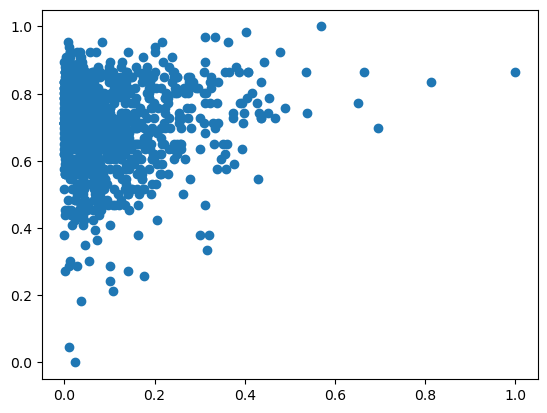

In [17]:
scaler = MinMaxScaler()

scaler.fit(df[['rate']])
df['rate'] = scaler.transform(df[['rate']])

scaler.fit(df[['gross']])
df['gross'] = scaler.transform(df[['gross']])

plt.scatter(df.gross,df['rate'])

In [18]:
notWon = df[df['Oscar_Best_Director_won'] == 0]

numDropRow = int(len(notWon)//1.03)
rtd = notWon.sample( numDropRow , random_state=42).index
df.drop(rtd, inplace=True)


In [19]:
print(len(df['Oscar_Best_Director_won']))
X = df[[ 'rate','metascore', 'awards_nominations','critic_reviews','votes','gross', 'awards_wins',]]
y = df['Oscar_Best_Director_won']
df.fillna(df.mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
# Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
didWin = df[df['Oscar_Best_Director_won'] == 1]
print(len(didWin))
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)
print("Predicted values:", y_pred)
print("   Actual values:", y_test.values)

51
17
Model accuracy: 0.875
Predicted values: [1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0]
   Actual values: [1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0]


/tmp/ipykernel_58/114356789.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


[Text(0.4444444444444444, 0.875, 'x[2] <= 28.5\ngini = 0.444\nsamples = 51\nvalue = [34, 17]'),
 Text(0.2222222222222222, 0.625, 'x[0] <= 0.886\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.3333333333333333, 0.375, 'x[2] <= 22.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.625, 'x[6] <= 7.5\ngini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7777777777777778, 0.375, 'x[5] <= 0.423\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

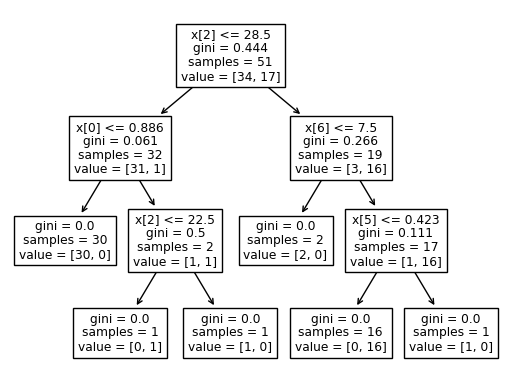

In [20]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
tree.plot_tree(clf)

